#### * Detect patterns in the dataset
#### * Find hidden insights from the data
#### * Automate analytical and statistical model building

1. Data collection
2. Data analysis
3. Data wrangling/Feature engineering
4. Train/Test Algorithms
5. Model Selection
6. Hyperparameter Tuning/ Optimisation
7. Prediction/Deployment

In [1]:
#!wget https://www.dropbox.com/s/webw4cr5dsnm3jv/iris1.csv

### 1: Load and analyze the data

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('iris1.csv')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,Iris-Setosa
1,4.9,3.0,1.4,0.2,Iris-Setosa
2,4.7,3.2,1.3,0.2,Iris-Setosa
3,4.6,3.1,1.5,0.2,Iris-Setosa
4,5.0,NaN,1.4,0.2,Iris-Setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  82 non-null     float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal length (cm)     0
sepal width (cm)     30
petal length (cm)    68
petal width (cm)      0
Class                 0
dtype: int64

### 2: Handle null values
if a column has more than 40% null values, drop that column
else fill the null values with mean of that column

In [6]:
for column in list(df.columns):
    if df[column].isnull().sum()>(0.40*150):
        df.drop(columns=column, axis=1,inplace=True)
    elif df[column].isnull().sum():
        df[column].replace(np.nan,df[column].mean(),inplace=True)
    else:
        continue

In [7]:
df

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,Iris-Setosa
1,4.9,3.0000,0.2,Iris-Setosa
2,4.7,3.2000,0.2,Iris-Setosa
3,4.6,3.1000,0.2,Iris-Setosa
4,5.0,3.0575,0.2,Iris-Setosa
...,...,...,...,...
145,6.7,3.0000,2.3,Iris-Virginica
146,6.3,2.5000,1.9,Iris-Virginica
147,6.5,3.0000,2.0,Iris-Virginica
148,6.2,3.0575,2.3,Iris-Virginica


### 3: We cannot use string objects for prediction, so convert categorical feature to numerical feature Tasks to do

Convert the categorical features to numerical values using Label Encoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Class']=le.fit_transform(df['Class'])
print(df.head())
print(df['Class'].unique())

   sepal length (cm)  sepal width (cm)  petal width (cm)  Class
0                5.1            3.5000               0.2      0
1                4.9            3.0000               0.2      0
2                4.7            3.2000               0.2      0
3                4.6            3.1000               0.2      0
4                5.0            3.0575               0.2      0
[0 1 2]


### 4: Handle outlier
 Check for outlier in all the columns using boxplot. 
 
 If there are outliers, clip them, lower limit will be Q1-1.5 IQR and upper limit will be Q3+1.5 IQR.
 Q1 = 1st Quartile (25%)
 Q3 = 3rd Quartile (75%)
 IQR = Inter-quartile range (Q3-Q1)

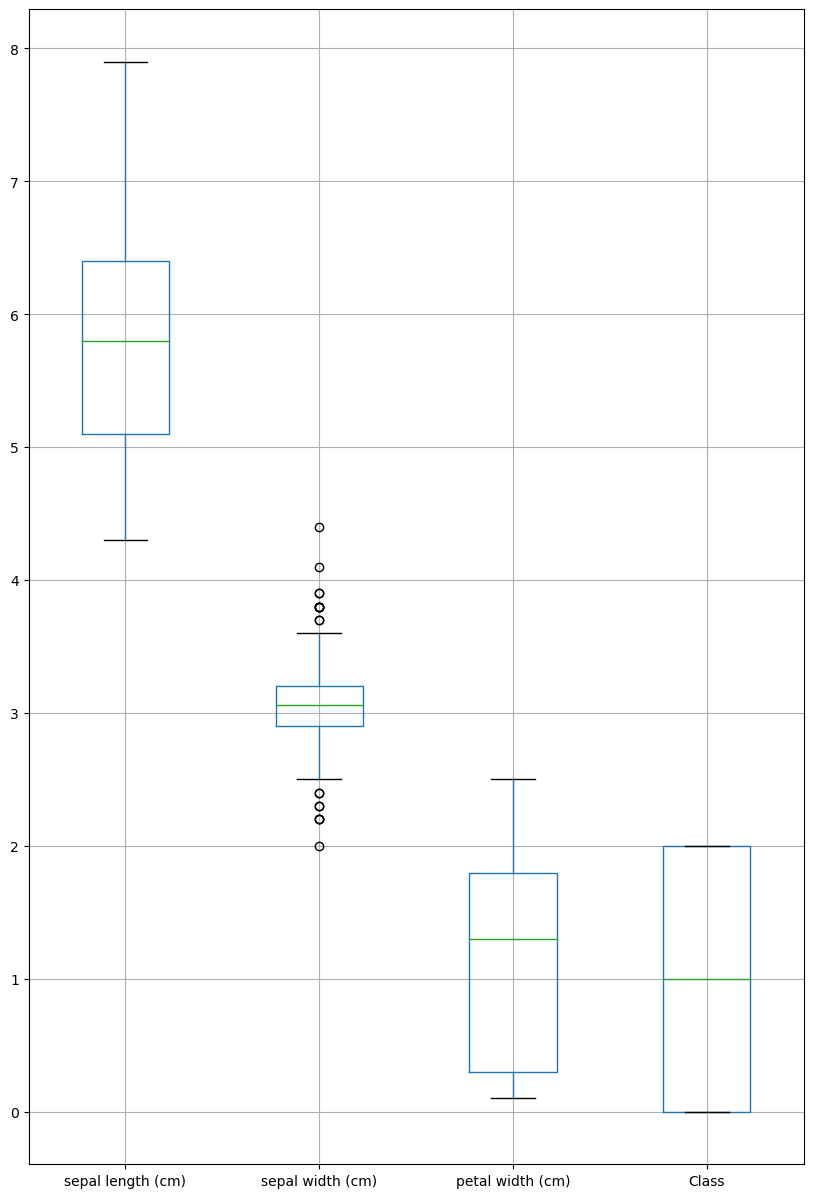

In [9]:
import matplotlib.pyplot as plt
df.boxplot(figsize=(10,15))
plt.show()

#### sepal width contains outliers

In [10]:
q1 = df['sepal width (cm)'].quantile(.25)
q3 = df['sepal width (cm)'].quantile(.75)
IQR = q3 - q1
df['sepal width (cm)'] = np.clip(df['sepal width (cm)'], q1 - 1.5 * IQR, q3 + 1.5 * IQR)

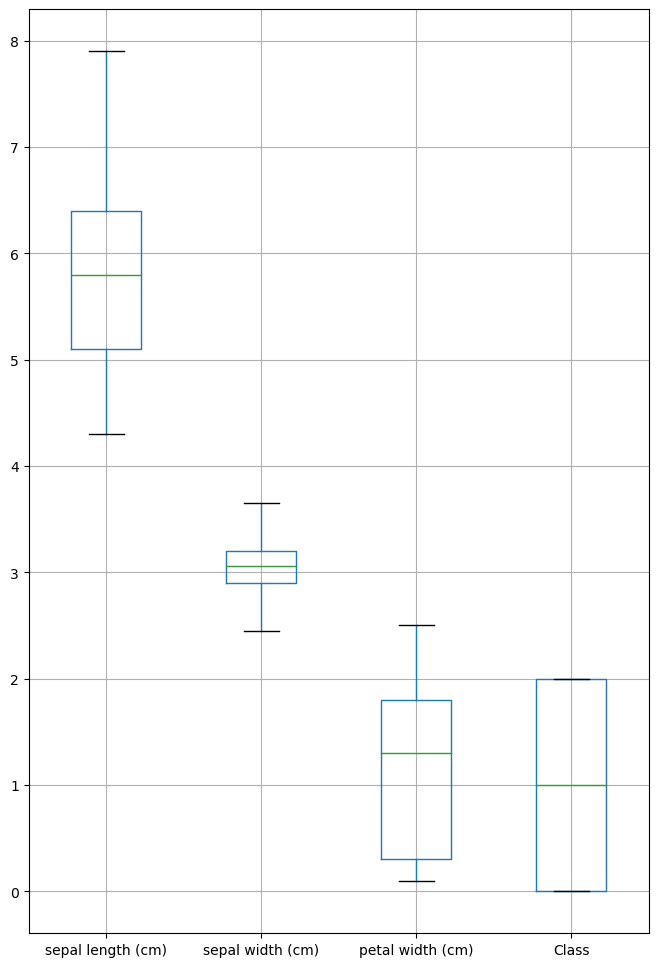

In [11]:
df.boxplot(figsize=(8,12))
plt.show()

### Now we can see there are no outliers left

In [12]:
df

,sepal length (cm),sepal width (cm),petal width (cm),Class
0,5.1,3.5000,0.2,0
1,4.9,3.0000,0.2,0
2,4.7,3.2000,0.2,0
3,4.6,3.1000,0.2,0
4,5.0,3.0575,0.2,0
...,...,...,...,...
145,6.7,3.0000,2.3,2
146,6.3,2.5000,1.9,2
147,6.5,3.0000,2.0,2
148,6.2,3.0575,2.3,2


#### Plot the correlation and tell which feature will help the most while prediction

     Calculate correlation
     Plot the correlation
     Compare the correlation

In [18]:
import seaborn as sns
sns.heatmap(df.corr())


<Axes: >

In [19]:
df.corr()

,sepal length (cm),sepal width (cm),petal width (cm),Class
sepal length (cm),1.000000,-0.155890,0.817941,0.782561
sepal width (cm),-0.155890,1.000000,-0.377261,-0.444903
petal width (cm),0.817941,-0.377261,1.000000,0.956547
Class,0.782561,-0.444903,0.956547,1.000000


In [20]:
from sklearn.model_selection import train_test_split
X= df.iloc[:,:-1]
y= df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.20,random_state = None)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 3)
(30, 3)
(120,)
(30,)


### Perform K-Fold cross validation

Perform K-fold with K=10 with random_state = 7

Perform K-Fold with commonly used classification algorithm

Calculate the mean score of each iteration

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:
from sklearn.model_selection import cross_val_score,KFold
#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


models=[]
models.append(('lr',LogisticRegression()))
models.append(('decision tree',DecisionTreeClassifier()))
models.append(('svm',SVC(gamma='auto')))
models.append(('knn',KNeighborsClassifier()))
models.append(('naive bayes',GaussianNB()))
models.append(('Random Forest',RandomForestClassifier()))



for name,model in models:
    kfold=KFold(n_splits=10,random_state=None)
    cross_val_sc=cross_val_score(model,X,y,scoring='accuracy',cv=kfold)
    print('{} : acc: {}(standard deviation: {})'.format(name,cross_val_sc.mean(),cross_val_sc.std()))

lr : acc: 0.9200000000000002(standard deviation: 0.07774602526460399)
decision tree : acc: 0.9200000000000002(standard deviation: 0.07774602526460399)
svm : acc: 0.9333333333333333(standard deviation: 0.07302967433402213)
knn : acc: 0.9333333333333333(standard deviation: 0.06666666666666665)
naive bayes : acc: 0.9400000000000001(standard deviation: 0.06289320754704401)
Random Forest : acc: 0.9333333333333333(standard deviation: 0.08432740427115676)


###  Train the model

Train a logistic regression model for prediction

Also, predict the classes for test data

In [23]:
model= LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

### Evaluate the model

Print confusion matrix of the test data

Also, find the precision and recall using classification report

precision is the fraction of relevant instances among the retrieved instances

while recall (also known as sensitivity) is the fraction of the total number of relevant instances retrieved

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.92      1.00      0.96        11
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

